In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('../') 
from reclab.environments import Topics
from reclab.environments import Engelhardt
from reclab.environments import LatentFactorBehavior
from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop
from reclab.recommenders import Autorec



/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/karlk/.bin/anaconda3/lib/python3.7/site-packages/tensorflow/

# Illustration of Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate the effect of different time-varying user behaviors on recommendation system quality. 
Specifically, we evaluate two metrics: observed ratings of recommended items, and predictive accuracy on recommended items. We may also want to look at diversity metrics, or those used in other papers.

In [2]:
## Key Parameters across all settings
expdirname = 'dynamic_user_static_rec'

topics = True

num_users = 100
num_items = 170
env_params = {
    'num_users': 100,
    'num_items': 170,
    'rating_frequency': 0.2,
    'num_init_ratings': 1000
}

exp_params = {
    'n_trials': 10,
    'len_trial': 20,
    'SEED': 24532,
}
num_init_ratings = 1000

## Static User Behavior

Here, the user model does not change over time. 

In [66]:
if topics:
    params = {'num_topics': 10}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'static_2'+env.name+'.npz'

recommenders = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01
    ),
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.1
    ),
    Autorec(
        num_users=num_users,
        num_items=num_items
    )
]
recommenders = [
    Autorec(
        num_users=num_users,
        num_items=num_items,
        base_lr=1e-2,
        train_epoch=50
    )  
]
ratings, preds = run_env_experiment(env, recommenders, 1, 500, 
                                    expdirname, datafilename, overwrite=True)

Training // Epoch 0 //  Total cost = 10676.52 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 10164.34 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 10084.53 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 10022.75 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 9923.55 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 9801.85 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 9677.75 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 9551.19 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 9418.85 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 9278.14 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 9123.86 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 8950.02 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 8756.03 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 8549.38 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 8341.46 Elapsed time : 0 sec
T

../reclab/recommenders/autorec/autorec_lib/autorec.py:134: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.array((Estimated_R[idx]))


Training // Epoch 0 //  Total cost = 2453.29 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2433.97 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2416.08 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2402.34 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2389.29 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2374.79 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2359.95 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2346.37 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2333.49 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2320.03 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2306.37 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2293.61 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2282.00 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2270.95 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2259.87 Elapsed time : 0 sec
Train

Training // Epoch 39 //  Total cost = 1979.41 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 1978.38 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 1977.39 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 1976.44 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 1975.51 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 1974.62 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 1973.75 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 1972.91 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 1972.09 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 1971.29 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 1970.52 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2074.96 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2065.45 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2057.50 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2052.62 Elapsed time : 0 sec

Training // Epoch 27 //  Total cost = 1918.29 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 1917.65 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 1917.05 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 1916.49 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 1915.94 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 1915.42 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 1914.89 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 1914.41 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 1913.95 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 1913.50 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 1913.07 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 1912.66 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 1912.25 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 1911.87 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 1911.49 Elapsed time : 0

Training // Epoch 0 //  Total cost = 2038.99 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2027.55 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2020.07 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2015.89 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2009.00 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2003.30 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 1998.16 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 1991.63 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 1985.13 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 1979.94 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 1974.65 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 1968.95 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 1963.96 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 1959.98 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 1955.57 Elapsed time : 0 sec
Train

Training // Epoch 1 //  Total cost = 2006.96 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 1999.14 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 1995.47 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 1990.36 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 1986.17 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 1982.53 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 1978.29 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 1974.25 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 1970.09 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 1967.03 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 1963.39 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 1960.15 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 1957.19 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 1954.39 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 1951.70 Elapsed time : 0 sec
Trai

Training // Epoch 9 //  Total cost = 1987.40 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 1982.33 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 1977.33 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 1972.87 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 1968.73 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 1964.74 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 1960.96 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 1957.77 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 1954.85 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 1952.16 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 1949.73 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 1947.42 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 1945.33 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 1943.41 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 1941.71 Elapsed time : 0 

Training // Epoch 9 //  Total cost = 2002.29 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 1997.95 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 1993.28 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 1988.81 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 1984.69 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 1981.21 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 1977.67 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 1974.17 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 1970.96 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 1968.25 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 1965.65 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 1963.17 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 1960.92 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 1958.94 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 1957.03 Elapsed time : 0 

Training // Epoch 44 //  Total cost = 1949.63 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 1949.09 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 1948.57 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 1948.07 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 1947.59 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 1947.12 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2070.49 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2063.85 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2056.81 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2051.14 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2046.19 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2041.80 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2037.71 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2033.27 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2028.34 Elapsed time : 0 sec
Trai

Training // Epoch 36 //  Total cost = 1933.60 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 1933.02 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 1932.46 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 1931.92 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 1931.41 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 1930.91 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 1930.44 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 1929.98 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 1929.53 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 1929.10 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 1928.69 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 1928.29 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 1927.90 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 1927.52 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2030.86 Elapsed time : 0 

Training // Epoch 0 //  Total cost = 2020.59 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2015.20 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2009.34 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2004.29 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2000.08 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 1996.36 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 1992.81 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 1989.12 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 1985.01 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 1980.93 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 1976.90 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 1973.04 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 1969.29 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 1965.76 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 1962.42 Elapsed time : 0 sec
Train

Training // Epoch 4 //  Total cost = 2014.68 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2010.58 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2006.73 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2002.95 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 1998.87 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 1994.91 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 1991.03 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 1987.32 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 1983.76 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 1980.34 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 1977.08 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 1973.95 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 1970.87 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 1967.99 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 1965.26 Elapsed time : 0 sec
T

Training // Epoch 22 //  Total cost = 1965.80 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 1964.07 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 1962.41 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 1960.84 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 1959.37 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 1957.98 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 1956.66 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 1955.39 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 1954.18 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 1953.00 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 1951.87 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 1950.78 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 1949.75 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 1948.76 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 1947.81 Elapsed time : 0

Training // Epoch 45 //  Total cost = 1947.69 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 1947.01 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 1946.34 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 1945.70 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 1945.07 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2055.81 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2051.20 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2045.80 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2039.86 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2034.92 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2030.63 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2026.90 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2023.44 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2020.44 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2017.29 Elapsed time : 0 sec
Train

Training // Epoch 26 //  Total cost = 2016.57 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 2014.79 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 2013.06 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 2011.42 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 2009.85 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 2008.32 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 2006.87 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 2005.46 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 2004.11 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 2002.81 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 2001.56 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 2000.36 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 1999.20 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 1998.08 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 1997.00 Elapsed time : 0

Training // Epoch 0 //  Total cost = 2137.20 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2132.91 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2128.15 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2122.74 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2117.68 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2113.75 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2110.15 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2106.95 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2104.21 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2101.56 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2099.01 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2096.50 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2093.90 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2091.33 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2088.78 Elapsed time : 0 sec
Train

Training // Epoch 18 //  Total cost = 2075.09 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 2072.87 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 2070.68 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 2068.58 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 2066.57 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 2064.59 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 2062.67 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 2060.83 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 2059.02 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 2057.29 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 2055.60 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 2053.96 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 2052.38 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 2050.84 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 2049.34 Elapsed time : 0

Training // Epoch 0 //  Total cost = 2153.08 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2149.90 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2146.14 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2142.03 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2137.74 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2134.01 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2130.84 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2127.92 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2125.25 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2122.82 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2120.51 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2118.20 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2115.90 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2113.59 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2111.27 Elapsed time : 0 sec
Train

Training // Epoch 11 //  Total cost = 2134.45 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2132.56 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2130.72 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2128.90 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 2127.13 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 2125.40 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 2123.71 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 2122.06 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 2120.44 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 2118.84 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 2117.29 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 2115.76 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 2114.25 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 2112.80 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 2111.39 Elapsed time : 0

Training // Epoch 49 //  Total cost = 2109.14 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2183.58 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2180.80 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2177.62 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2174.32 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2170.65 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2166.96 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2163.58 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2160.48 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2157.53 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2154.73 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2152.11 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2149.68 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2147.37 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2145.13 Elapsed time : 0 sec
Train

Training // Epoch 0 //  Total cost = 2242.13 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2239.03 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2235.18 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2231.03 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2226.45 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2221.76 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2217.47 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2213.58 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2209.94 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2206.58 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2203.56 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2200.77 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2198.14 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2195.70 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2193.36 Elapsed time : 0 sec
Train

Training // Epoch 0 //  Total cost = 2262.30 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2259.69 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2256.37 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2252.93 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2249.30 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2245.49 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2241.78 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2238.42 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2235.38 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2232.53 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2229.83 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2227.28 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2224.86 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2222.58 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2220.40 Elapsed time : 0 sec
Train

Training // Epoch 7 //  Total cost = 2271.47 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2268.74 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2266.20 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2263.77 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2261.46 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2259.31 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2257.29 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2255.37 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 2253.51 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 2251.71 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 2249.97 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 2248.25 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 2246.56 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 2244.90 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 2243.29 Elapsed time : 0 se

Training // Epoch 39 //  Total cost = 2275.27 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 2273.99 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 2272.73 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 2271.49 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 2270.26 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 2269.05 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 2267.85 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 2266.67 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 2265.50 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 2264.34 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 2263.20 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2363.69 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2361.52 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2358.88 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2356.18 Elapsed time : 0 sec

Training // Epoch 18 //  Total cost = 2414.57 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 2412.63 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 2410.74 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 2408.90 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 2407.12 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 2405.37 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 2403.66 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 2401.98 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 2400.34 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 2398.73 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 2397.15 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 2395.61 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 2394.09 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 2392.59 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 2391.12 Elapsed time : 0

Training // Epoch 49 //  Total cost = 2401.03 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 2490.77 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2489.25 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2487.43 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2485.50 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2483.54 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2481.51 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2479.35 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2477.10 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2474.85 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2472.68 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2470.62 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2468.63 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2466.68 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2464.77 Elapsed time : 0 sec
Train

Training // Epoch 3 //  Total cost = 2515.23 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2513.33 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2511.42 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2509.42 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2507.30 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2505.11 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2502.93 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2500.82 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2498.80 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2496.88 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2495.02 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2493.21 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 2491.45 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 2489.73 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 2488.07 Elapsed time : 0 sec
Tr

Training // Epoch 0 //  Total cost = 2598.73 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 2597.28 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2595.50 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2593.58 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2591.61 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2589.63 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2587.62 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2585.55 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2583.44 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2581.31 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2579.21 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2577.17 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2575.21 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2573.32 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2571.48 Elapsed time : 0 sec
Train

Training // Epoch 1 //  Total cost = 2675.48 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2673.82 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2672.02 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2670.17 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2668.32 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2666.46 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2664.56 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2662.61 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2660.61 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2658.61 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2656.63 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2654.71 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2652.85 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2651.06 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 2649.31 Elapsed time : 0 sec
Trai

Training // Epoch 1 //  Total cost = 2759.47 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 2757.97 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 2756.44 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 2754.96 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 2753.50 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 2751.98 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 2750.35 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 2748.64 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 2746.92 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 2745.24 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 2743.62 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 2742.03 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 2740.46 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 2738.89 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 2737.34 Elapsed time : 0 sec
Trai

Training // Epoch 19 //  Total cost = 2866.95 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 2865.40 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 2863.87 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 2862.38 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 2860.91 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 2859.47 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 2858.06 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 2856.68 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 2855.32 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 2853.99 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 2852.68 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 2851.39 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 2850.12 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 2848.87 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 2847.64 Elapsed time : 0

Training // Epoch 32 //  Total cost = 2938.41 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 2937.30 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 2936.21 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 2935.12 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 2934.06 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 2933.00 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 2931.95 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 2930.92 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 2929.90 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 2928.88 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 2927.88 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 2926.89 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 2925.91 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 2924.94 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 2923.97 Elapsed time : 0

Training // Epoch 17 //  Total cost = 2994.83 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 2993.65 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 2992.48 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 2991.34 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 2990.21 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 2989.10 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 2988.01 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 2986.93 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 2985.86 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 2984.81 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 2983.77 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 2982.74 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 2981.73 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 2980.74 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 2979.76 Elapsed time : 0

Training // Epoch 17 //  Total cost = 3111.51 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 3110.50 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 3109.51 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 3108.52 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 3107.55 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 3106.59 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 3105.64 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 3104.70 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 3103.76 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 3102.84 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 3101.93 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 3101.03 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 3100.14 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 3099.25 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 3098.38 Elapsed time : 0

Training // Epoch 28 //  Total cost = 3337.48 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 3336.48 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 3335.50 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 3334.52 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 3333.55 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 3332.60 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 3331.65 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 3330.72 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 3329.79 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 3328.87 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 3327.96 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 3327.06 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 3326.17 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 3325.29 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 3324.42 Elapsed time : 0

Training // Epoch 30 //  Total cost = 3450.60 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 3449.79 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 3449.00 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 3448.21 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 3447.42 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 3446.64 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 3445.87 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 3445.10 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 3444.34 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 3443.59 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 3442.84 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 3442.09 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 3441.35 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 3440.62 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 3439.89 Elapsed time : 0

Training // Epoch 37 //  Total cost = 3631.54 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 3630.79 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 3630.04 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 3629.29 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 3628.55 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 3627.82 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 3627.09 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 3626.36 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 3625.64 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 3624.93 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 3624.22 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 3623.51 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 3622.80 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 3731.67 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 3730.90 Elapsed time : 0 s

Training // Epoch 31 //  Total cost = 3808.00 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 3807.27 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 3806.54 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 3805.81 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 3805.09 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 3804.38 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 3803.67 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 3802.96 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 3802.26 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 3801.56 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 3800.87 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 3800.18 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 3799.49 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 3798.81 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 3798.13 Elapsed time : 0

Training // Epoch 0 //  Total cost = 4022.46 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 4021.81 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 4021.14 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 4020.45 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 4019.75 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 4019.04 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 4018.32 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 4017.61 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 4016.90 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 4016.19 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 4015.48 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 4014.77 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 4014.07 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 4013.38 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 4012.68 Elapsed time : 0 sec
Train

Training // Epoch 36 //  Total cost = 4124.51 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 4123.93 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 4123.36 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 4122.78 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 4122.21 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 4121.64 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 4121.07 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 4120.51 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 4119.95 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 4119.39 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 4118.83 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 4118.28 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 4117.73 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 4117.18 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 4176.47 Elapsed time : 0 

Training // Epoch 5 //  Total cost = 4322.22 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 4321.61 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 4320.99 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 4320.38 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 4319.76 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 4319.15 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 4318.55 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 4317.95 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 4317.35 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 4316.75 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 4316.16 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 4315.58 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 4314.99 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 4314.40 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 4313.82 Elapsed time : 0 sec


Training // Epoch 9 //  Total cost = 4517.83 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 4517.23 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 4516.63 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 4516.03 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 4515.44 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 4514.84 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 4514.25 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 4513.66 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 4513.08 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 4512.49 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 4511.91 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 4511.33 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 4510.76 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 4510.18 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 4509.61 Elapsed time : 0 

Training // Epoch 12 //  Total cost = 4708.15 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 4707.61 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 4707.06 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 4706.52 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 4705.97 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 4705.44 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 4704.90 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 4704.37 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 4703.83 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 4703.30 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 4702.78 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 4702.25 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 4701.73 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 4701.21 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 4700.69 Elapsed time : 0

Training // Epoch 33 //  Total cost = 4898.44 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 4897.96 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 4897.49 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 4897.02 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 4896.55 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 4896.08 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 4895.62 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 4895.15 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 4894.69 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 4894.23 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 4893.77 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 4893.31 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 4892.85 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 4892.40 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 4891.94 Elapsed time : 0

Training // Epoch 0 //  Total cost = 5269.51 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 5269.05 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 5268.58 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 5268.10 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 5267.61 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 5267.12 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 5266.62 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 5266.12 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 5265.62 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 5265.11 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 5264.61 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 5264.10 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 5263.59 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 5263.08 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 5262.58 Elapsed time : 0 sec
Train

Training // Epoch 33 //  Total cost = 5605.43 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 5605.00 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 5604.57 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 5604.13 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 5603.71 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 5603.28 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 5602.85 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 5602.42 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 5602.00 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 5601.57 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 5601.15 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 5600.73 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 5600.31 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 5599.89 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 5599.47 Elapsed time : 0

Training // Epoch 27 //  Total cost = 6004.20 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 6003.77 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 6003.34 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 6002.91 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 6002.49 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 6002.06 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 6001.64 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 6001.22 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 6000.80 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 6000.38 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 5999.96 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 5999.55 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 5999.14 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 5998.72 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 5998.31 Elapsed time : 0

Training // Epoch 0 //  Total cost = 6307.84 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 6307.50 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 6307.16 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 6306.82 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 6306.47 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 6306.12 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 6305.78 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 6305.42 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 6305.08 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 6304.72 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 6304.37 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 6304.02 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 6303.67 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 6303.32 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 6302.97 Elapsed time : 0 sec
Train

Training // Epoch 32 //  Total cost = 6519.64 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 6519.33 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 6519.02 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 6518.71 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 6518.40 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 6518.09 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 6517.79 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 6517.48 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 6517.17 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 6516.87 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 6516.57 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 6516.26 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 6515.96 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 6515.66 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 6515.36 Elapsed time : 0

Training // Epoch 9 //  Total cost = 6932.21 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 6931.92 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 6931.62 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 6931.33 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 6931.03 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 6930.74 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 6930.44 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 6930.14 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 6929.85 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 6929.55 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 6929.26 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 6928.97 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 6928.67 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 6928.38 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 6928.09 Elapsed time : 0 

Training // Epoch 44 //  Total cost = 7190.58 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 7190.34 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 7190.09 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 7189.85 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 7189.60 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 7189.36 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 7308.21 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 7307.97 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 7307.72 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 7307.48 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 7307.23 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 7306.97 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 7306.72 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 7306.47 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 7306.21 Elapsed time : 0 sec
Trai

Training // Epoch 6 //  Total cost = 7617.60 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 7617.37 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 7617.14 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 7616.91 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 7616.67 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 7616.44 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 7616.21 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 7615.98 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 7615.74 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 7615.51 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 7615.28 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 7615.05 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 7614.81 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 7614.58 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 7614.35 Elapsed time : 0 sec

Training // Epoch 18 //  Total cost = 7937.26 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 7937.04 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 7936.82 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 7936.60 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 7936.38 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 7936.16 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 7935.94 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 7935.73 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 7935.51 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 7935.29 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 7935.07 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 7934.85 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 7934.64 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 7934.42 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 7934.20 Elapsed time : 0

Training // Epoch 47 //  Total cost = 8115.17 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 8114.96 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 8114.74 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 8207.23 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 8207.02 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 8206.81 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 8206.60 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 8206.39 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 8206.18 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 8205.97 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 8205.75 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 8205.54 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 8205.33 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 8205.11 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 8204.90 Elapsed time : 0 sec
Train

Training // Epoch 0 //  Total cost = 8505.26 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 8505.08 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 8504.91 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 8504.73 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 8504.55 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 8504.37 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 8504.19 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 8504.01 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 8503.82 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 8503.64 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 8503.46 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 8503.28 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 8503.09 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 8502.91 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 8502.73 Elapsed time : 0 sec
Train

Training // Epoch 18 //  Total cost = 8895.78 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 8895.61 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 8895.44 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 8895.26 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 8895.10 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 8894.92 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 8894.75 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 8894.58 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 8894.42 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 8894.24 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 8894.08 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 8893.91 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 8893.74 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 8893.57 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 8893.40 Elapsed time : 0

Training // Epoch 32 //  Total cost = 9254.74 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 9254.59 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 9254.44 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 9254.28 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 9254.13 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 9253.98 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 9253.83 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 9253.68 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 9253.53 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 9253.37 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 9253.22 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 9253.07 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 9252.92 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 9252.78 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 9252.62 Elapsed time : 0

Training // Epoch 13 //  Total cost = 9637.75 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 9637.61 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 9637.47 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 9637.32 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 9637.18 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 9637.04 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 9636.90 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 9636.75 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 9636.61 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 9636.47 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 9636.33 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 9636.18 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 9636.04 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 9635.90 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 9635.76 Elapsed time : 0

Training // Epoch 23 //  Total cost = 9936.09 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 9935.97 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 9935.85 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 9935.73 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 9935.61 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 9935.49 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 9935.37 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 9935.25 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 9935.13 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 9935.01 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 9934.89 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 9934.77 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 9934.65 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 9934.53 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 9934.41 Elapsed time : 0

Training // Epoch 38 //  Total cost = 10355.23 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 10355.12 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 10355.01 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 10354.90 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 10354.79 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 10354.68 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 10354.57 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 10354.46 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 10354.35 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 10354.24 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 10354.13 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 10354.02 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 10411.53 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 10411.42 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 10411.32 Elap

Training // Epoch 18 //  Total cost = 10795.72 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 10795.62 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 10795.52 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 10795.42 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 10795.32 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 10795.22 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 10795.13 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 10795.03 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 10794.93 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 10794.83 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 10794.73 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 10794.64 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 10794.54 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 10794.44 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 10794.34 E

Training // Epoch 0 //  Total cost = 11270.90 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 11270.81 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 11270.72 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 11270.63 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 11270.54 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 11270.45 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 11270.36 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 11270.27 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 11270.18 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 11270.09 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 11270.00 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 11269.91 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 11269.82 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 11269.73 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 11269.63 Elapsed tim

Training // Epoch 22 //  Total cost = 11631.47 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 11631.39 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 11631.30 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 11631.23 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 11631.14 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 11631.07 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 11630.99 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 11630.91 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 11630.83 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 11630.75 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 11630.67 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 11630.59 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 11630.51 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 11630.43 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 11630.35 E

Training // Epoch 3 //  Total cost = 12081.11 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 12081.04 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 12080.97 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 12080.89 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 12080.82 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 12080.75 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 12080.67 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 12080.60 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 12080.53 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 12080.45 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 12080.38 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 12080.30 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 12080.23 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 12080.15 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 12080.08 Elapsed 

Training // Epoch 5 //  Total cost = 12650.93 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 12650.86 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 12650.80 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 12650.73 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 12650.66 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 12650.59 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 12650.52 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 12650.46 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 12650.39 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 12650.32 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 12650.26 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 12650.19 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 12650.12 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 12650.05 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 12649.99 Elapse

Training // Epoch 39 //  Total cost = 13027.12 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 13027.06 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 13027.00 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 13026.94 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 13026.88 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 13026.82 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 13026.77 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 13026.71 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 13026.65 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 13026.59 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 13026.53 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 13151.17 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 13151.11 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 13151.05 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 13150.99 Elaps

Training // Epoch 17 //  Total cost = 13645.96 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 13645.90 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 13645.85 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 13645.79 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 13645.74 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 13645.69 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 13645.63 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 13645.58 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 13645.53 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 13645.47 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 13645.42 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 13645.37 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 13645.31 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 13645.26 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 13645.21 E

Training // Epoch 49 //  Total cost = 14037.62 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 14146.47 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 14146.42 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 14146.37 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 14146.32 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 14146.28 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 14146.23 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 14146.18 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 14146.13 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 14146.09 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 14146.04 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 14145.99 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 14145.95 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 14145.90 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 14145.85 Elapsed tim

Training // Epoch 3 //  Total cost = 14586.85 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 14586.81 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 14586.77 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 14586.72 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 14586.68 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 14586.64 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 14586.60 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 14586.56 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 14586.51 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 14586.48 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 14586.43 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 14586.39 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 14586.35 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 14586.31 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 14586.27 Elapsed 

Training // Epoch 18 //  Total cost = 15065.14 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 15065.10 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 15065.07 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 15065.03 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 15065.00 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 15064.96 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 15064.92 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 15064.89 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 15064.85 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 15064.82 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 15064.78 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 15064.75 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 15064.71 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 15064.67 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 15064.64 E

Training // Epoch 24 //  Total cost = 15591.21 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 15591.18 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 15591.15 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 15591.12 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 15591.08 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 15591.05 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 15591.02 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 15590.99 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 15590.95 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 15590.92 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 15590.89 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 15590.86 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 15590.83 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 15590.79 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 15590.76 E

Training // Epoch 0 //  Total cost = 15993.47 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 15993.44 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 15993.41 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 15993.38 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 15993.35 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 15993.33 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 15993.30 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 15993.27 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 15993.24 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 15993.21 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 15993.19 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 15993.16 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 15993.13 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 15993.10 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 15993.07 Elapsed tim

Training // Epoch 10 //  Total cost = 16554.53 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 16554.50 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 16554.47 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 16554.45 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 16554.42 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 16554.39 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 16554.37 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 16554.34 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 16554.31 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 16554.28 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 16554.26 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 16554.23 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 16554.21 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 16554.18 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 16554.15 E

Training // Epoch 40 //  Total cost = 17051.50 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 17051.48 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 17051.46 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 17051.44 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 17051.41 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 17051.39 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 17051.37 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 17051.34 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 17051.32 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 17051.29 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 17180.88 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 17180.86 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 17180.84 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 17180.82 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 17180.80 Elapse

Training // Epoch 1 //  Total cost = 17696.26 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 17696.24 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 17696.22 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 17696.21 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 17696.19 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 17696.17 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 17696.14 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 17696.13 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 17696.11 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 17696.09 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 17696.06 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 17696.04 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 17696.03 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 17696.01 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 17695.99 Elapsed ti

Training // Epoch 22 //  Total cost = 18083.09 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 18083.07 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 18083.06 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 18083.04 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 18083.02 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 18083.00 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 18082.98 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 18082.96 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 18082.95 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 18082.93 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 18082.91 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 18082.90 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 18082.88 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 18082.86 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 18082.84 E

Training // Epoch 32 //  Total cost = 18589.64 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 18589.63 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 18589.61 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 18589.60 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 18589.58 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 18589.57 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 18589.55 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 18589.54 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 18589.52 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 18589.51 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 18589.49 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 18589.47 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 18589.46 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 18589.45 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 18589.43 E

Training // Epoch 0 //  Total cost = 19130.64 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 19130.63 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 19130.62 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 19130.60 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 19130.59 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 19130.58 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 19130.56 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 19130.55 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 19130.54 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 19130.52 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 19130.51 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 19130.49 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 19130.49 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 19130.47 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 19130.46 Elapsed tim

Training // Epoch 23 //  Total cost = 19713.86 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 19713.84 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 19713.83 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 19713.82 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 19713.81 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 19713.80 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 19713.78 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 19713.77 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 19713.76 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 19713.75 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 19713.74 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 19713.72 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 19713.71 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 19713.70 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 19713.69 E

Training // Epoch 0 //  Total cost = 20393.81 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 20393.80 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 20393.79 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 20393.79 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 20393.78 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 20393.76 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 20393.76 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 20393.75 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 20393.74 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 20393.73 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 20393.72 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 20393.72 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 20393.70 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 20393.70 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 20393.69 Elapsed tim

Training // Epoch 37 //  Total cost = 20915.62 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 20915.61 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 20915.60 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 20915.60 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 20915.59 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 20915.58 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 20915.58 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 20915.57 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 20915.56 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 20915.56 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 20915.55 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 20915.54 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 20915.53 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 21090.90 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 21090.89 Ela

Training // Epoch 19 //  Total cost = 21800.74 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 21800.74 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 21800.73 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 21800.72 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 21800.71 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 21800.71 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 21800.70 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 21800.69 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 21800.69 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 21800.68 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 21800.67 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 21800.66 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 21800.66 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 21800.65 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 21800.65 E

Training // Epoch 40 //  Total cost = 21972.13 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 21972.13 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 21972.12 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 21972.12 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 21972.11 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 21972.10 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 21972.10 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 21972.09 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 21972.08 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 21972.07 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 22103.60 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 22103.59 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 22103.58 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 22103.58 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 22103.57 Elapse

Training // Epoch 20 //  Total cost = 22620.03 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 22620.02 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 22620.02 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 22620.02 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 22620.02 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 22620.01 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 22620.01 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 22620.00 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 22620.00 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 22619.99 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 22619.99 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 22619.99 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 22619.98 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 22619.98 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 22619.97 E

Training // Epoch 0 //  Total cost = 23329.11 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 23329.11 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 23329.10 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 23329.10 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 23329.10 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 23329.10 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 23329.09 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 23329.09 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 23329.08 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 23329.08 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 23329.08 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 23329.07 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 23329.07 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 23329.07 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 23329.06 Elapsed tim

Training // Epoch 35 //  Total cost = 23811.25 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 23811.25 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 23811.25 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 23811.25 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 23811.24 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 23811.24 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 23811.24 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 23811.23 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 23811.23 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 23811.23 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 23811.22 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 23811.22 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 23811.22 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 23811.22 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 23811.21 E

Training // Epoch 0 //  Total cost = 24551.25 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 24551.25 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 24551.25 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 24551.25 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 24551.25 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 24551.24 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 24551.24 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 24551.24 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 24551.24 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 24551.23 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 24551.23 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 24551.23 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 24551.23 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 24551.23 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 24551.23 Elapsed tim

Training // Epoch 32 //  Total cost = 25133.65 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 25133.65 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 25133.64 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 25133.64 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 25133.64 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 25133.64 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 25133.64 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 25133.63 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 25133.64 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 25133.63 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 25133.63 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 25133.63 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 25133.63 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 25133.63 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 25133.63 E

Training // Epoch 15 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 25877.94 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 25877.95 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 25877.94 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 25877.94 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 25877.94 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 25877.94 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 25877.94 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 25877.94 E

Training // Epoch 0 //  Total cost = 26520.08 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 26520.08 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 26520.08 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 26520.08 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 26520.07 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 26520.07 Elapsed tim

Training // Epoch 0 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 27184.00 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 27184.00 Elapsed tim

Training // Epoch 1 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 27891.27 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 27891.27 Elapsed ti

Training // Epoch 0 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 28419.42 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 28419.42 Elapsed tim

Training // Epoch 0 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 28808.96 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 28808.96 Elapsed tim

Training // Epoch 1 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 29543.29 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 29543.29 Elapsed ti

Training // Epoch 0 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 30213.66 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 30213.66 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 30213.66 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 30213.66 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 30213.66 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 30213.65 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 30213.65 Elapsed tim

Training // Epoch 7 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 30966.13 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 30966.13 Elap

Training // Epoch 13 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 31568.63 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 31568.63 E

Training // Epoch 23 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 32141.69 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 32141.69 E

Training // Epoch 28 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 32721.07 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 32721.07 E

Training // Epoch 40 //  Total cost = 33500.74 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 33500.75 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 33500.74 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 33500.75 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 33500.75 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 33500.74 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 33500.75 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 33500.75 Elapsed time : 0 sec
Training // Epoch 48 //  Total cost = 33500.74 Elapsed time : 0 sec
Training // Epoch 49 //  Total cost = 33500.74 Elapsed time : 0 sec
Training // Epoch 0 //  Total cost = 33697.59 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 33697.59 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 33697.59 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 33697.59 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 33697.59 Elapse

Training // Epoch 0 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 34149.45 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 34149.45 Elapsed tim

Training // Epoch 14 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 34840.75 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 34840.75 E

Training // Epoch 33 //  Total cost = 35558.81 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 35558.81 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 35558.81 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 39 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 40 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 41 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 42 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 43 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 44 //  Total cost = 35558.81 Elapsed time : 0 sec
Training // Epoch 45 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 46 //  Total cost = 35558.82 Elapsed time : 0 sec
Training // Epoch 47 //  Total cost = 35558.82 E

Training // Epoch 20 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 36220.21 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 36220.21 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 36220.22 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 36220.22 E

Training // Epoch 1 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 36852.54 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 36852.54 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 36852.53 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 36852.53 Elapsed ti

Training // Epoch 0 //  Total cost = 37362.27 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 37362.26 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 37362.27 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 37362.27 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 37362.26 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 37362.25 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 37362.26 Elapsed tim

Training // Epoch 20 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 37788.50 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 37788.50 E

Training // Epoch 23 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 38326.57 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 38326.57 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 38326.57 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 38326.58 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 38326.58 E

Training // Epoch 18 //  Total cost = 38983.48 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 38983.46 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 38983.48 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 38983.47 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 38983.48 E

Training // Epoch 24 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 36 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 37 //  Total cost = 39702.84 Elapsed time : 0 sec
Training // Epoch 38 //  Total cost = 39702.84 E

Training // Epoch 16 //  Total cost = 40390.22 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 40390.21 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 40390.21 E

Training // Epoch 0 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 41111.19 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 41111.19 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 41111.19 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 41111.19 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 41111.20 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 41111.20 Elapsed tim

Training // Epoch 1 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 41767.49 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 41767.49 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 41767.50 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 41767.50 Elapsed ti

Training // Epoch 8 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 42495.46 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 42495.45 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 42495.45 Ela

Training // Epoch 4 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 43072.39 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 43072.39 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 43072.39 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 15 //  Total cost = 43072.39 Elapsed time : 0 sec
Training // Epoch 16 //  Total cost = 43072.40 Elapsed time : 0 sec
Training // Epoch 17 //  Total cost = 43072.39 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 43072.39 Elapsed

Training // Epoch 21 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 43824.17 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 43824.17 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 43824.17 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 33 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 34 //  Total cost = 43824.18 Elapsed time : 0 sec
Training // Epoch 35 //  Total cost = 43824.17 E

Training // Epoch 17 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 18 //  Total cost = 44508.72 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 44508.71 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 44508.71 E

Training // Epoch 0 //  Total cost = 45187.15 Elapsed time : 0 sec
Training // Epoch 1 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 2 //  Total cost = 45187.15 Elapsed time : 0 sec
Training // Epoch 3 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 4 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 5 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 6 //  Total cost = 45187.15 Elapsed time : 0 sec
Training // Epoch 7 //  Total cost = 45187.15 Elapsed time : 0 sec
Training // Epoch 8 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 9 //  Total cost = 45187.15 Elapsed time : 0 sec
Training // Epoch 10 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 11 //  Total cost = 45187.15 Elapsed time : 0 sec
Training // Epoch 12 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 13 //  Total cost = 45187.16 Elapsed time : 0 sec
Training // Epoch 14 //  Total cost = 45187.15 Elapsed tim

Training // Epoch 18 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 19 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 20 //  Total cost = 45755.63 Elapsed time : 0 sec
Training // Epoch 21 //  Total cost = 45755.64 Elapsed time : 0 sec
Training // Epoch 22 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 23 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 24 //  Total cost = 45755.64 Elapsed time : 0 sec
Training // Epoch 25 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 26 //  Total cost = 45755.64 Elapsed time : 0 sec
Training // Epoch 27 //  Total cost = 45755.63 Elapsed time : 0 sec
Training // Epoch 28 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 29 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 30 //  Total cost = 45755.62 Elapsed time : 0 sec
Training // Epoch 31 //  Total cost = 45755.63 Elapsed time : 0 sec
Training // Epoch 32 //  Total cost = 45755.62 E

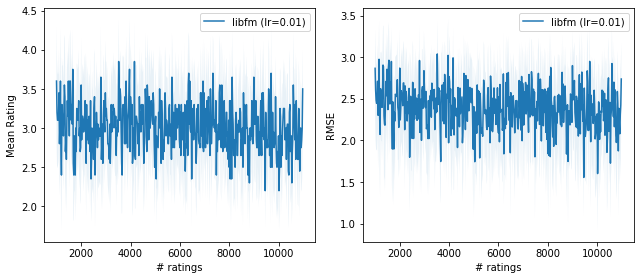

In [67]:
plot_ratings_mses(ratings, preds, num_init_ratings, ['libfm (lr=0.01)', 'libfm(lr=0.1)', 'autorec'])

## Partially Hidden User Behavior

Here, there is a portion of item utility that is unknown to a user until the item is consumed. From the paper "How Algorithmic Confounding in Recommendation Systems
Increases Homogeneity and Decreases Utility".

In [16]:
if topics:
    params = {'num_topics': 10}
    env = Engelhardt(**params, **env_params)

    datafilename = env.name+'.npz'
    ratings, preds = run_env_experiment(env, recommenders, 100, 20, 
                                        expdirname, datafilename, overwrite=True)

Util is 0.43576240294078794 and rating is 0.42704611145002164
Util is 0.045825417364991385 and rating is 0.04490932183887713
Util is 0.02283329586615969 and rating is 0.022376835644033876
Util is 0.08799222701450068 and rating is 0.08623252922944129
Util is 0.041133747421113954 and rating is 0.04031119645680155
Util is 0.00021372647204908834 and rating is 0.00020945184843271732
Util is 0.003520363429855535 and rating is 0.003449990448008239
Util is 2.8227552754020406 and rating is 2.7662940445635535
Util is 0.01810487765147968 and rating is 0.01774292852181411
Util is 2.180637255767735 and rating is 2.1369982560050813
Util is 0.21653825481042777 and rating is 0.21220695545960896
Util is 4.105310925505976 and rating is 4.023118151078334
Util is 0.8060662217878367 and rating is 0.7899492504387919
Util is 0.003939137460601174 and rating is 0.0038603794973785534
Util is 0.5807135193939255 and rating is 0.5690999075620194
Util is 0.056361540188859444 and rating is 0.05523400188777893
Util i

Util is 1.8700865984640145 and rating is 1.8326803885771947
Util is 2.925193173234635 and rating is 2.8666880208271026
Util is 0.01828656557675933 and rating is 0.017920922874718154
Util is 0.05540037044052268 and rating is 0.05429244589290428
Util is 4.9541796635647275 and rating is 4.855183872713288
Util is 3.869406917298316 and rating is 3.7920224161395986
Util is 0.9305756552808011 and rating is 0.9119549691494394
Util is 3.2062777810346104 and rating is 3.14215851461984
Util is 0.9446419494058886 and rating is 0.9257451540360055
Util is 0.2046011048958163 and rating is 0.200510894555452
Util is 0.28040657782830014 and rating is 0.2748029660415828
Util is 0.17045450934288112 and rating is 0.16704779309120998
Util is 1.218093765592099 and rating is 1.1937208820789253
Util is 0.19735045190610218 and rating is 0.1934019033140091
Util is 0.0025625578720194437 and rating is 0.00251130311913429
Util is 3.6370475384551257 and rating is 3.5643127075112138
Util is 2.2398283456451855 and rat

Util is 0.31388388678608 and rating is 0.30760592586646934
Util is 1.774556106368841 and rating is 1.739060735071442
Util is 0.34235726270689854 and rating is 0.33550573169090303
Util is 1.710165225967488 and rating is 1.6759435288141797
Util is 0.5766629740286148 and rating is 0.565123144628609
Util is 0.002579331407605249 and rating is 0.002527734232281946
Util is 0.006073487239230789 and rating is 0.005951988316775964
Util is 0.9812639034877313 and rating is 0.9616437842479704
Util is 0.19802395792829777 and rating is 0.1940666006345336
Util is 0.45430280410856644 and rating is 0.44521127826756324
Util is 2.3715617584116733 and rating is 2.3241246720011084
Util is 0.010401902441662728 and rating is 0.010193778011584564
Util is 0.20809211875876962 and rating is 0.2039271860999705
Util is 3.3997547841280977 and rating is 3.331762884166486
Util is 2.238585447154419 and rating is 2.1938238787647846
Util is 0.0007085770724244522 and rating is 0.00069440528697027
Util is 3.646623278696490

Util is 2.5904014068982546 and rating is 2.5385977374615756
Util is 3.6600954413796005 and rating is 3.5869413014596185
Util is 4.311387201477702 and rating is 4.225119529154926
Util is 1.933720693459033 and rating is 1.895056722471129
Util is 0.2241459184809821 and rating is 0.21966062221861143
Util is 2.5690513195692266 and rating is 2.5176691611636106
Util is 1.2039575378661065 and rating is 1.1798672542346982
Util is 2.3158558508777243 and rating is 2.269529264069643
Util is 0.061190650774677474 and rating is 0.05996715945874245
Util is 2.2056352303025264 and rating is 2.161491485076749
Util is 3.3607810073402664 and rating is 3.2935513114553436
Util is 0.4342005511105787 and rating is 0.42551445414334316
Util is 1.3629220009461076 and rating is 1.3356587442935106
Util is 0.07173205383997608 and rating is 0.07029782708377119
Util is 0.002651635507849177 and rating is 0.002598572587617266
Util is 0.03182299164374307 and rating is 0.031186975012517104
Util is 3.840769875030344 and ra

Util is 0.0008664703793972128 and rating is 0.0008491323419480524
Util is 0.2758261506042027 and rating is 0.27031086511747976
Util is 0.27381194528858044 and rating is 0.2683349796924275
Util is 0.09328944788457547 and rating is 0.0914246181513867
Util is 0.07908317863062794 and rating is 0.07750222107987058
Util is 0.8073187516773306 and rating is 0.7911799919570434
Util is 0.24364035060728395 and rating is 0.2387686497381983
Util is 0.8402812230008931 and rating is 0.8234842385141689
Util is 1.2359282357867873 and rating is 1.211197361487941
Util is 0.726841120755482 and rating is 0.7122994575973611
Util is 0.09999586448978233 and rating is 0.09799392769934236
Util is 0.13510226337325112 and rating is 0.13240000386761921
Util is 1.9449437012023347 and rating is 1.906027825337508
Util is 0.4531063396543561 and rating is 0.44404571270814897
Util is 2.7076120318740173 and rating is 2.6534234815538773
Util is 3.1118350892616324 and rating is 3.049614922412846
Util is 0.00572646564383791

Util is 0.021367577062230338 and rating is 0.020940240713087328
Util is 0.0009320688457310995 and rating is 0.0009134440740230084
Util is 0.06995665830760911 and rating is 0.06855808848874616
Util is 0.00016789747446738012 and rating is 0.00016453853837226394
Util is 0.32069645454297546 and rating is 0.31428201690830004
Util is 1.3108622566494383 and rating is 1.2846373850523698
Util is 0.00046222116025035733 and rating is 0.0004529674020999931
Util is 3.7472299028222906 and rating is 3.672343191410606
Util is 2.8833580937475842 and rating is 2.8257110306801403
Util is 0.009464082488899246 and rating is 0.009274767084357037
Util is 0.010026795954526761 and rating is 0.0098262844637055
Util is 0.0842552989881811 and rating is 0.08256956711714185
Util is 0.0022103385904367404 and rating is 0.0021661418537091653
Util is 0.8232492329127516 and rating is 0.8067946625138577
Util is 0.27893800561969195 and rating is 0.2733563016928291
Util is 0.027022440038852014 and rating is 0.0264817293274

Util is 0.26797390351959094 and rating is 0.26260901349067883
Util is 2.887840755763883 and rating is 2.83012145354714
Util is 0.21494327113528738 and rating is 0.2106461841407491
Util is 3.149897437745076 and rating is 3.0869393357918065
Util is 0.010067436424175525 and rating is 0.009866241648401152
Util is 0.5156031945626149 and rating is 0.5052877777189685
Util is 0.030283724659199637 and rating is 0.029678252242887622
Util is 0.019765602949248458 and rating is 0.019370474678451467
Util is 0.0006025797191959359 and rating is 0.0005905297441563124
Util is 2.0738963116449454 and rating is 2.0324234544340714
Util is 1.351393907322177 and rating is 1.3243810999183039
Util is 1.8627743355212047 and rating is 1.8255139807089809
Util is 0.2509695148254408 and rating is 0.2459531226768892
Util is 0.02251065982807703 and rating is 0.02206032652190753
Util is 0.005729302856169259 and rating is 0.005614705420180396
Util is 0.13294088326756473 and rating is 0.13028333667809022
Util is 4.689382

Util is 0.15105056989817184 and rating is 0.14802980241541103
Util is 0.0018192250656422254 and rating is 0.0017828343894528069
Util is 0.007459501790473484 and rating is 0.007310380851315492
Util is 3.545449801979323 and rating is 3.4745982808535656
Util is 0.2253073379338756 and rating is 0.22080428194205742
Util is 0.7143787333756566 and rating is 0.7000894500455845
Util is 0.08971732037985733 and rating is 0.08792233896252404
Util is 0.7411602000376865 and rating is 0.7263519218302357
Util is 1.8769470142860811 and rating is 1.83941813843157
Util is 0.0007315882669409803 and rating is 0.0007169576256929807
Util is 0.15081946568774562 and rating is 0.1478024752071197
Util is 0.05887126101170349 and rating is 0.057693725641793814
Util is 2.510391023920089 and rating is 2.460176762162546
Util is 0.03140523121164779 and rating is 0.03077695231800036
Util is 0.19778953711161662 and rating is 0.1938340701981112
Util is 0.04125333123082559 and rating is 0.04042867749423825
Util is 0.61848

Util is 0.22528634526282149 and rating is 0.22078572480961872
Util is 0.06763198083794743 and rating is 0.06627940695478629
Util is 1.9123416069138732 and rating is 1.8741332863086595
Util is 0.33528133946218774 and rating is 0.32857232134372766
Util is 0.13074518751151096 and rating is 0.12813046490428223
Util is 0.6340708250513888 and rating is 0.6213878919695506
Util is 0.06911858658943126 and rating is 0.06773731005282889
Util is 3.464580711948075 and rating is 3.395304112603893
Util is 0.1893041060622167 and rating is 0.18552046917025053
Util is 0.037381294330109595 and rating is 0.03663389886351632
Util is 0.298827603104243 and rating is 0.29284757687472723
Util is 0.07549251037020188 and rating is 0.07398251891432812
Util is 0.009521656433916007 and rating is 0.009331131749272789
Util is 0.4144538830801808 and rating is 0.40616338331888124
Util is 0.0036883483157880213 and rating is 0.0036145873881796515
Util is 2.7042789160092595 and rating is 2.6501630696393237
Util is 0.03746

Util is 1.5232551490942399 and rating is 1.4928007248152726
Util is 3.045880535703975 and rating is 2.9849560680613303
Util is 2.54332553271969 and rating is 2.492460759479943
Util is 2.9112419275948347 and rating is 2.8530218554415097
Util is 0.04145561590304868 and rating is 0.04062667013785818
Util is 2.2233294970119637 and rating is 2.178865067993897
Util is 0.3442971915856087 and rating is 0.3374145267315231
Util is 2.9746159335128484 and rating is 2.915108902577318
Util is 1.827093591871947 and rating is 1.7905582660347183
Util is 0.003339566830841496 and rating is 0.0032728258180659384
Util is 3.3317766990714768 and rating is 3.2651853799363537
Util is 2.876187205402465 and rating is 2.8186482898804823
Util is 0.0181579378123278 and rating is 0.017794833848656433
Util is 0.03620729727876613 and rating is 0.03548279810208578
Util is 0.0015554672752650352 and rating is 0.001524360319746786
Util is 2.380444480693914 and rating is 2.3328433655892664
Util is 0.8857226264601058 and ra

Util is 0.05536001352598106 and rating is 0.054253659196059775
Util is 0.4593181635533358 and rating is 0.450133510417566
Util is 0.7316947639569893 and rating is 0.7170481307054165
Util is 2.471511726580142 and rating is 2.4220540367380616
Util is 0.03071432173180865 and rating is 0.0300999941391765
Util is 0.01395307799624618 and rating is 0.013673962409608113
Util is 0.05873614377236411 and rating is 0.05756102231475582
Util is 0.3401170876603743 and rating is 0.3333191720753186
Util is 0.006598893557420326 and rating is 0.006466947173831556
Util is 0.13801890820155369 and rating is 0.13525889466668486
Util is 0.7208564754037982 and rating is 0.7064513962049996
Util is 0.04859880606329814 and rating is 0.04762635278001395
Util is 0.0002290936573188748 and rating is 0.0002245089543252987
Util is 0.0410535669395105 and rating is 0.04023229459211112
Util is 0.02567851726271537 and rating is 0.025165112081864754
Util is 0.00026403694089263707 and rating is 0.00025875495433067355
Util is

Util is 1.5584989874098203 and rating is 1.5273459380363448
Util is 1.2541662416719532 and rating is 1.2290931495682889
Util is 0.2870236269467294 and rating is 0.2812855007759038
Util is 0.1611061217892036 and rating is 0.15788555394560308
Util is 0.007601967786507155 and rating is 0.007449853791694587
Util is 1.4088614856610462e-05 and rating is 1.3806558673625231e-05
Util is 0.711640933845093 and rating is 0.6974008461868231
Util is 0.13911857444950157 and rating is 0.1363352758341805
Util is 0.034564641246767065 and rating is 0.0338733561541789
Util is 0.005546796954109308 and rating is 0.005435865706991675
Util is 0.00041763707707325 and rating is 0.00040928082621123814
Util is 0.0007093849149381817 and rating is 0.0006951937789663559
Util is 0.6543232681438584 and rating is 0.6412353271444557
Util is 0.015621876044851551 and rating is 0.015309530329789585
Util is 1.8038789426784003 and rating is 1.767812390955496
Util is 3.805385003296262 and rating is 3.7292687551792167
Util is 

Util is 0.2835346104152186 and rating is 0.27786855768064733
Util is 0.07939591295250475 and rating is 0.07780781563897986
Util is 0.3060072279741883 and rating is 0.2998850068564837
Util is 1.915322359957086 and rating is 1.877034394645142
Util is 0.022638615174171407 and rating is 0.02218587323931165
Util is 0.008948556887635878 and rating is 0.008769608769137845
Util is 0.2705736416260884 and rating is 0.26516487538586697
Util is 0.054470938211660755 and rating is 0.05338126085709699
Util is 0.002798325100761059 and rating is 0.002742347763551801
Util is 0.6362508461833845 and rating is 0.6235322413511951
Util is 0.5338396602983526 and rating is 0.5231653946501144
Util is 3.11412886392342 and rating is 3.051899085900755
Util is 0.029257987552462564 and rating is 0.0286729725289319
Util is 0.28221930229342623 and rating is 0.2765761347160577
Util is 3.777303138111095 and rating is 3.7017213587248534
Util is 0.00039401813836515754 and rating is 0.0003861425157853958
Util is 0.61945067

Util is 0.05100838175199826 and rating is 0.04998840403157738
Util is 3.18445543505395 and rating is 3.120829420527391
Util is 0.0016563066097019573 and rating is 0.0016231858793749486
Util is 0.5145021922943515 and rating is 0.5042145844495511
Util is 0.32240534712105573 and rating is 0.31595485945691393
Util is 0.0634591808043391 and rating is 0.06219053797621836
Util is 0.2430159245492996 and rating is 0.2381568067337498
Util is 1.8515721804484422 and rating is 1.8145593968542633
Util is 0.45995499037789933 and rating is 0.4507505224482789
Util is 0.034159834788086416 and rating is 0.033476639699479095
Util is 9.183914081841276e-05 and rating is 9.000041549774799e-05
Util is 1.4043942659065876 and rating is 1.376317839027172
Util is 2.562872414588369 and rating is 2.5116251865790833
Util is 0.19174565171139937 and rating is 0.18790967619336554
Util is 0.7903193826329381 and rating is 0.7745106274315813
Util is 3.4460626173767614e-05 and rating is 3.377185811487866e-05
Util is 0.1821

Util is 0.27221491968793493 and rating is 0.26677367890054765
Util is 0.11196513988227022 and rating is 0.10972431983703203
Util is 1.5447857304883001 and rating is 1.5138961142167964
Util is 0.03507243211944484 and rating is 0.034370524821183863
Util is 0.5086131491782573 and rating is 0.498443886671403
Util is 0.611838056283372 and rating is 0.5995934346771254
Util is 0.35212436987994317 and rating is 0.34508828223046784
Util is 3.1055810866469855 and rating is 3.04342179744904
Util is 0.001198159193993876 and rating is 0.0011741949872950848
Util is 0.010573797111367859 and rating is 0.010362278884922298
Util is 0.03984590979262634 and rating is 0.039049018435645476
Util is 0.5215010418703337 and rating is 0.511063831729262
Util is 4.100307713231413 and rating is 4.018350423156381
Util is 0.18211432274101347 and rating is 0.17846807352010877
Util is 0.002097220161446347 and rating is 0.002055300671698918
Util is 0.01748825230295964 and rating is 0.017138830675472342
Util is 0.1673779

Util is 0.0841834698808342 and rating is 0.08249796867013277
Util is 0.0013150289919390305 and rating is 0.0012887207433594841
Util is 1.2693995597089396 and rating is 1.2440381090092023
Util is 0.007271596247584415 and rating is 0.007126240581340396
Util is 0.009023496719771514 and rating is 0.008842942974101677
Util is 0.03460900205177059 and rating is 0.03391683081877925
Util is 0.33925408724984146 and rating is 0.3324672942193836
Util is 1.2973915442245492 and rating is 1.271437802153574
Util is 3.9572005368914653 and rating is 3.8780910208774944
Util is 1.5276536563279821 and rating is 1.497080605478817
Util is 0.0019611868618364956 and rating is 0.0019219822446268128
Util is 0.2876097414135737 and rating is 0.2818584553530489
Util is 0.014999219697564717 and rating is 0.014699304231181117
Util is 3.114379762385787 and rating is 3.052047349251424
Util is 0.016783062168197947 and rating is 0.016447506268359106
Util is 0.4957171531836921 and rating is 0.4857968942555466
Util is 0.00

Util is 1.8787474040471042 and rating is 1.8411790003420099
Util is 0.05961031158801349 and rating is 0.058417804666406344
Util is 2.152674432599272 and rating is 2.109630836369404
Util is 3.789853904952609 and rating is 3.7140937749438065
Util is 1.579313107017155 and rating is 1.547720494235659
Util is 0.31326432942508764 and rating is 0.3069976793716925
Util is 0.169055282900346 and rating is 0.16567403292684105
Util is 2.616268402121843 and rating is 2.563918733877857
Util is 1.3069024396752336 and rating is 1.2807675627014459
Util is 0.017871623195590547 and rating is 0.01751391335946326
Util is 0.03351214176704388 and rating is 0.03284163026096449
Util is 2.7805386699356074 and rating is 2.7249282545745497
Util is 4.511226802366106 and rating is 4.420979151154862
Util is 0.6306512988975381 and rating is 0.6180451846695633
Util is 0.7723291614304406 and rating is 0.7568867332526532
Util is 0.05880298068267434 and rating is 0.05762761893862357
Util is 0.6988050080853678 and rating 

Util is 0.18654296079931015 and rating is 0.1828092751153437
Util is 0.13144732149973434 and rating is 0.12881947252122553
Util is 0.16143600429545585 and rating is 0.15820718938080308
Util is 0.017529156486547143 and rating is 0.017178474141398805
Util is 1.7342627424917143 and rating is 1.6995508064752216
Util is 0.043145061094069855 and rating is 0.04228203055204797
Util is 0.28711312085067153 and rating is 0.2813716360637548
Util is 2.229216337741993 and rating is 2.18466005988085
Util is 0.44999356626816966 and rating is 0.44099115367195696
Util is 0.17702566671400521 and rating is 0.1734829674850556
Util is 0.2161991426205518 and rating is 0.21187452540568438
Util is 0.009243345845998872 and rating is 0.00905851129233518
Util is 0.05967635686604729 and rating is 0.05848232476087476
Util is 0.1807184020449592 and rating is 0.17710163230829643
Util is 6.757752793517424e-05 and rating is 6.622619967873626e-05
Util is 0.3733008706504656 and rating is 0.3658395502586742
Util is 0.0117

Util is 0.014395959721483574 and rating is 0.014107901593391165
Util is 1.1231092128808768 and rating is 1.100638583352436
Util is 0.22186492211144643 and rating is 0.21742857835009902
Util is 0.022838258960787353 and rating is 0.022381317315242125
Util is 0.13440806591137397 and rating is 0.13171883348546237
Util is 1.4882260539914047 and rating is 1.4584438285235526
Util is 2.214541436327343 and rating is 2.170239619408544
Util is 0.16376998319238123 and rating is 0.16049069859256765
Util is 0.017169571497916397 and rating is 0.016826141361400197
Util is 4.096273242327627 and rating is 4.014352315684734
Util is 0.0003581988712872156 and rating is 0.0003510341687372896
Util is 0.03113107201987599 and rating is 0.030508199602088566
Util is 0.0005260205771075491 and rating is 0.0005154964719843124
Util is 0.08506315259766253 and rating is 0.08336191430377048
Util is 4.523152856851107 and rating is 4.432733059556638
Util is 3.0719030526880147 and rating is 3.0104757471320402
Util is 0.12

Util is 2.521649644439087 and rating is 2.471244931736649
Util is 0.9932292035163782 and rating is 0.9733710693316333
Util is 0.05411544232512215 and rating is 0.05303314922919315
Util is 0.7610992470360065 and rating is 0.745886591426542
Util is 0.008360642340695388 and rating is 0.00819340443424743
Util is 0.006644984570163754 and rating is 0.006512168488620442
Util is 0.4882336327844747 and rating is 0.4784770227722634
Util is 0.4289058145566827 and rating is 0.42033485721131825
Util is 1.1193260117128967 and rating is 1.0969378222800725
Util is 0.0019724292748956713 and rating is 0.0019330055017687065
Util is 0.14767742643533027 and rating is 0.14472229090294061
Util is 1.308920262563387 and rating is 1.2827446869645371
Util is 2.2765590121643537 and rating is 2.231035522719351
Util is 3.5076364668911886 and rating is 3.4374639287050357
Util is 0.6161361977152273 and rating is 0.6038283665995466
Util is 0.11584303555536804 and rating is 0.11352599591124751
Util is 0.005114260224801

Util is 4.811762623006241 and rating is 4.715500135862153
Util is 3.0008161811248835 and rating is 2.9407616815734614
Util is 0.16309220276563852 and rating is 0.15983138050811369
Util is 6.990755559872234e-05 and rating is 6.850891495509941e-05
Util is 0.8545149709780784 and rating is 0.8374102220236628
Util is 2.0191691044434883 and rating is 1.9787705391206734
Util is 0.0001653456840256171 and rating is 0.00016203931426438199
Util is 0.8113829689820086 and rating is 0.795153597919361
Util is 0.034688338736804394 and rating is 0.0339945182395584
Util is 1.9778242610792798 and rating is 1.938257962217333
Util is 4.246445926808518 and rating is 4.161528509537588
Util is 2.5928221385580756 and rating is 2.540943755911667
Util is 0.013414964198458404 and rating is 0.013146461653178272
Util is 0.11237213626459831 and rating is 0.11012291340217044
Util is 1.890573829045331 and rating is 1.8527835881375365
Util is 1.5892412347510867 and rating is 1.5574651475462098
Util is 0.004470262671377

Util is 0.26037896327830157 and rating is 0.2551711872940289
Util is 4.176968511755628 and rating is 4.093452099627896
Util is 0.0032989003506634024 and rating is 0.003232927581773714
Util is 0.18847006096644844 and rating is 0.18470251170379773
Util is 0.11707667913688596 and rating is 0.11473542349852792
Util is 0.05033250356740119 and rating is 0.049325682428127605
Util is 0.005140505787038997 and rating is 0.005037637707559239
Util is 0.00010142635488346734 and rating is 9.939563434794881e-05
Util is 0.0536241466851985 and rating is 0.05255133984994468
Util is 0.6992147925252612 and rating is 0.6852213421236847
Util is 3.035481294061171 and rating is 2.974761351318054
Util is 1.5503970524533937 and rating is 1.519386826313849
Util is 0.0021242771895493037 and rating is 0.0020818047492112074
Util is 0.09675014322718944 and rating is 0.09481551191077137
Util is 0.0005867166834925112 and rating is 0.00057497501500514
Util is 0.0015866723557574774 and rating is 0.0015549325186908411
Ut

Util is 0.1490703560073623 and rating is 0.14608883425463812
Util is 2.797267162490365 and rating is 2.7413477564332163
Util is 0.02357751385021925 and rating is 0.023105825098292305
Util is 9.178758855470727e-05 and rating is 8.995051834422684e-05
Util is 0.26791183992851036 and rating is 0.26255312764238614
Util is 3.768963958342344 and rating is 3.693607224353397
Util is 0.0727524787117516 and rating is 0.07129585579851004
Util is 1.9356762280121753 and rating is 1.896948481332725
Util is 1.118487059990513 and rating is 1.096112842837107
Util is 2.3005919181555017 and rating is 2.2545982729264535
Util is 0.6139181741778644 and rating is 0.6016341955185627
Util is 1.2002034298379238 and rating is 1.1762059579869018
Util is 2.4057579750540214 and rating is 2.357618675052023
Util is 1.8650521964022317 and rating is 1.8277513031578725
Util is 5.288281828441309e-05 and rating is 5.1824763519463146e-05
Util is 2.549553795085081 and rating is 2.4985542226798345
Util is 3.1438304612441414 a

Util is 3.7663174709041956 and rating is 3.6909785700624846
Util is 0.44560505518371885 and rating is 0.4366957027631621
Util is 0.01662786504871827 and rating is 0.016295147359697802
Util is 0.15109720928167042 and rating is 0.14807550816294562
Util is 0.7222671368542198 and rating is 0.7078269856686222
Util is 1.4143522398941513 and rating is 1.3860671546071504
Util is 0.8141040229083335 and rating is 0.7978168431406414
Util is 4.060336800119625 and rating is 3.9791464104921626
Util is 1.3714506127080424 and rating is 1.3439987296375129
Util is 1.3323679923423084 and rating is 1.3057108431018951
Util is 0.3247924733916898 and rating is 0.31829836368324255
Util is 0.03837503564081769 and rating is 0.0376078333708248
Util is 0.05856335603595199 and rating is 0.05739253034922926
Util is 1.1575703805105624 and rating is 1.1344045015758641
Util is 2.5160796957426528 and rating is 2.465724421028128
Util is 2.345401144753171 and rating is 2.2985176331106802
Util is 3.309570934053809 and rat

Util is 4.105328390054637 and rating is 4.023242503216059
Util is 0.3758163656937222 and rating is 0.36829795396754655
Util is 0.027149746046877955 and rating is 0.02660701580079452
Util is 0.07903946268849062 and rating is 0.07745788228573856
Util is 0.007600300684138085 and rating is 0.007448380837574573
Util is 0.009950884181878937 and rating is 0.009751801843047574
Util is 0.32261088174731994 and rating is 0.3161574844790736
Util is 0.039906190947127114 and rating is 0.03910799313723889
Util is 0.052197171144406786 and rating is 0.05115360413205326
Util is 0.591633552669117 and rating is 0.5797974781221472
Util is 0.021666766032766877 and rating is 0.02123312547630294
Util is 0.10540175843490247 and rating is 0.10329470429924686
Util is 0.005471337029616302 and rating is 0.0053619814077925715
Util is 3.2551613837767284 and rating is 3.190090960120713
Util is 2.287517522091422 and rating is 2.2417462306562324
Util is 0.024274763036450916 and rating is 0.02378927228540055
Util is 0.0

Util is 0.40725650350102316 and rating is 0.39911190251141826
Util is 1.5493194937558576 and rating is 1.5183265952081713
Util is 0.006826244695977457 and rating is 0.006689702419324054
Util is 0.6968233531837225 and rating is 0.682892975091591
Util is 2.602676658292271 and rating is 2.5506307034766427
Util is 0.45978788727689435 and rating is 0.4505942248464539
Util is 1.7967483423851829 and rating is 1.7607900612294447
Util is 4.045517888753362 and rating is 3.9645150182232247
Util is 2.7022780247352345 and rating is 2.6482329662600756
Util is 0.15706839947980755 and rating is 0.15392608125910534
Util is 0.02483438508623327 and rating is 0.024337475977922966
Util is 0.004718797386782784 and rating is 0.004624468992917223
Util is 0.04823936604099695 and rating is 0.04727460670235904
Util is 0.1615172181889547 and rating is 0.15828731685816438
Util is 0.1433382503047988 and rating is 0.14047209347350065
Util is 0.3041782950997258 and rating is 0.29809349472537494
Util is 0.050123770286

Util is 2.14684796552532 and rating is 2.103919755555114
Util is 0.36817207879754765 and rating is 0.3608071430378861
Util is 0.33346855379236806 and rating is 0.32679558750476245
Util is 0.0032301944482727935 and rating is 0.00316555002034013
Util is 0.6284966028046306 and rating is 0.6159281822091529
Util is 1.3391012528612947 and rating is 1.3123114990929767
Util is 0.252351154431502 and rating is 0.2473009868302264
Util is 2.4567737977728923 and rating is 2.407610299988759
Util is 1.1330911536006716 and rating is 1.110425187357636
Util is 3.290354079460729 and rating is 3.2245854746625127
Util is 0.5016925776683634 and rating is 0.491657418393608
Util is 0.574169141259919 and rating is 0.5626865043568735
Util is 2.767408046892046 and rating is 2.7120699105189137
Util is 0.0014615254153228794 and rating is 0.0014322886282075306
Util is 2.611205511495693 and rating is 2.5589667589605103
Util is 0.01635709533051528 and rating is 0.01602972298936703
Util is 1.7349952188267148 and ratin

Util is 3.8881792882270165 and rating is 3.8104081594149206
Util is 0.13358469354779112 and rating is 0.1309123548325144
Util is 0.49048487924553025 and rating is 0.48066442456732167
Util is 0.7405473653600803 and rating is 0.7257416038125208
Util is 0.10347943766872109 and rating is 0.1014084280525682
Util is 0.6475570530786446 and rating is 0.6345961976445118
Util is 0.07248529628106397 and rating is 0.07103596053008931
Util is 0.1569910087464091 and rating is 0.15385226948263342
Util is 1.8532094431427844 and rating is 1.816140996506828
Util is 0.25685723338929883 and rating is 0.25171843548088557
Util is 1.9688701647027291 and rating is 1.92947980487923
Util is 0.017802714812404946 and rating is 0.01744706521100631
Util is 1.9858778951582832 and rating is 1.9462087134642707
Util is 0.01987662249320675 and rating is 0.019478906271731787
Util is 0.00987712848500028 and rating is 0.009679578895173886
Util is 0.7489260072879618 and rating is 0.7339378494933207
Util is 0.381511648739771

Util is 4.466968285353257 and rating is 4.377637724269153
Util is 1.6263078516367335 and rating is 1.5937842363073675
Util is 0.6346470489575697 and rating is 0.6219500231244648
Util is 3.2252151157591724 and rating is 3.1606340279328293
Util is 0.6823419937150974 and rating is 0.6686936150514173
Util is 0.6013692255009518 and rating is 0.5893373759288077
Util is 0.023620633421550036 and rating is 0.023148203964855903
Util is 0.39558537983659575 and rating is 0.3876765757637062
Util is 0.4073871981304823 and rating is 0.3992365775914774
Util is 1.4690234779960323 and rating is 1.4396107904753173
Util is 0.03500696563699749 and rating is 0.03430710445787892
Util is 1.3676266073477752 and rating is 1.3402686624718096
Util is 3.0166163786981337 and rating is 2.95624073320533
Util is 0.0005105100916307267 and rating is 0.0005003072418715977
Util is 0.04520527283435682 and rating is 0.0443013923988065
Util is 1.8694060188682715 and rating is 1.8320281680760453
Util is 0.020249429288498967 a

KeyboardInterrupt: 

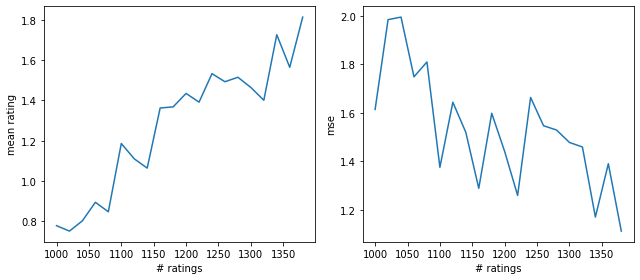

In [9]:
plot_ratings_mses(mean_ratings, mses, env_params)

## User Interests Shift with Exposure

Here, the underlying user interest changes over time to match the body of items that have been recommended.

In [19]:
if topics:
    params = {'num_topics': 10, 'topic_change': 0.1}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8, 'affinity_change': 0.1}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'increasing_interest_'+env.name+'.npz'
ratings, preds = run_env_experiment(env, recommenders, 1, 200, 
                                    expdirname, datafilename, overwrite=True)

Saving to data/dynamic_user_static_rec/increasing_interest_topics.npz


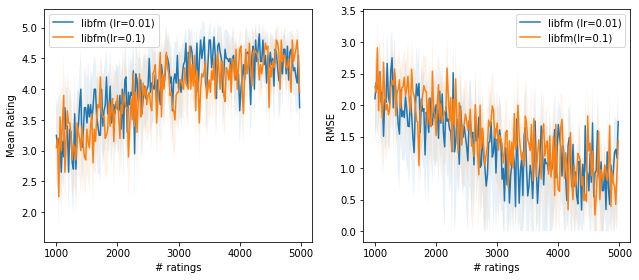

In [20]:
plot_ratings_mses(ratings, preds, num_init_ratings, ['libfm (lr=0.01)', 'libfm(lr=0.1)'])

## User Gets Bored

Here, user interest decreases for items too similar to those that they have recently been exposed to, with some decay in the effect.

In [14]:
if topics:
    params = {'num_topics': 10, 'memory_length': 5, 'boredom_threshold': 2, 
              'boredom_penalty': 1.0}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8, 'memory_length': 5, 'boredom_threshold': 0.5, 
              'boredom_penalty': 1.0}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'boredom_'+env.name+'.npz'
ratings, preds = run_env_experiment(env, recommenders, 10, 200, 
                                    expdirname, datafilename, overwrite=True)

reading from data/dynamic_user_static_rec/boredom_topics.npz


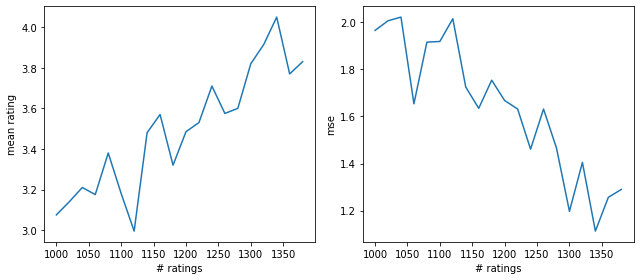

In [15]:
plot_ratings_mses(mean_ratings, mses, env_params)

## User Interests Shift, also Gets Bored

This is a combination of the previous two cases, where users gradually become more interested in topics that they are exposed to, but also exhibit boredom when they see many similar items in a row.

In [31]:
if topics:
    params = {'num_topics': 10, 'topic_change': 0.1, 'memory_length': 5, 
              'boredom_threshold': 2, 'boredom_penalty': 1.0}
    env = Topics(**params, **env_params)
else:
    params = {'latent_dim': 8, 'affinity_change': 0.1, 'memory_length': 5, 
              'boredom_threshold': 0.5, 'boredom_penalty': 1.0}
    env = LatentFactorBehavior(**params, **env_params)
datafilename = 'boredom_and_interest_'+env.name+'.npz'
ratings, preds = run_env_experiment(env, recommenders, 10, 200, 
                                    expdirname, datafilename, overwrite=True)

Saving to data/dynamic_user_static_rec/boredom_and_interest_topics.npz


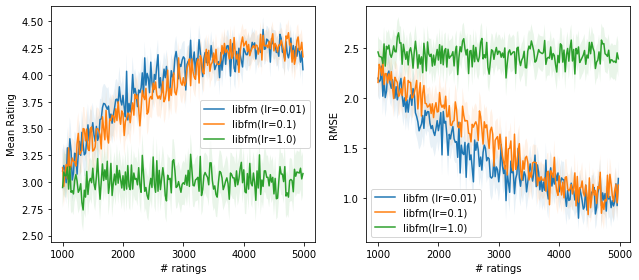

In [32]:
plot_ratings_mses(ratings, preds, num_init_ratings, ['libfm (lr=0.01)', 'libfm(lr=0.1)', 'libfm(lr=1.0)'])